# Análisis Exploratorio de Reseñas de Goodreads

**Autor:** Medina Sebastian  
**Fecha:** Mayo 2025  

**Objetivo:**  
Explorar un dataset de ~380 K reseñas de Goodreads para responder a un conjunto de hipótesis sobre la relación entre calificaciones, longitud de reseñas, género literario, fecha de publicación y analisis de sentimiento.

##Carga de recursos
En esta sección realizamos:
- Importación de librerías (pandas, numpy, matplotlib, scipy, nltk…)
- Carga del dataset (`.csv`)
- Limpieza básica: tipos, nulos, eliminación de columnas irrelevantes
- Cálculo de columnas auxiliares (`review_len`, `age_years`, `is_long`, etc.)

In [ ]:
# Conectar a Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importacion de librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, kruskal, mannwhitneyu, chisquare
import numpy as np

In [ ]:
#Carga del dataset
books_df = pd.read_csv('./drive/MyDrive/all_genres.csv')

<ipython-input-3-6ad7f9e61cbe>:2: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv('./drive/MyDrive/all_genres.csv')


##Revision de los datos

In [ ]:
print(books_df.shape)  # Filas y columnas

(382765, 40)


In [ ]:
books_df.head()  # Primeras 5 filas

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,...,publication_month,edition_information,publication_year,url,image_url,ratings_count,work_id,title,title_without_series,genre
0,7b2e5fe9fd353fecf3eeebb4850b88d3,17349055,7aa4ea3fd182ca340b15f97dddf613fc,3,"Hmmmm, that's what I did exactly when I knew I...",Fri Nov 29 19:49:34 -0800 2013,Fri Nov 29 19:55:32 -0800 2013,Fri Nov 29 00:00:00 -0800 2013,NaN,0,...,9.0,NaN,2013.0,https://www.goodreads.com/book/show/17349055-t...,https://images.gr-assets.com/books/1363807793m...,4866,24034540,The Real Boy,The Real Boy,children
1,0ef32090550901ead25cb0ea21c4d36b,20670372,b5deb532868a39c63b26fe42a1e0d684,3,The reason this is three stars instead of four...,Sun Apr 13 20:40:33 -0700 2014,Mon Jun 30 09:12:17 -0700 2014,Mon Apr 14 00:00:00 -0700 2014,Sun Apr 13 00:00:00 -0700 2014,5,...,3.0,NaN,2014.0,https://www.goodreads.com/book/show/20670372-f...,https://images.gr-assets.com/books/1480174219m...,12,25778634,File Under: 13 Suspicious Incidents,File Under: 13 Suspicious Incidents,children
2,856ef5c59addeac180bcfc3b0d6ea38a,301736,74a1c38b6caaa99b4513251c5ad1b031,5,Beautiful little book. Really nice illustratio...,Tue Oct 23 15:36:23 -0700 2012,Tue Oct 23 15:36:55 -0700 2012,NaN,NaN,0,...,1.0,NaN,2005.0,https://www.goodreads.com/book/show/301736.Gue...,https://images.gr-assets.com/books/1320457007m...,106285,45331,Guess How Much I Love You,Guess How Much I Love You,children
3,cd6522e9018f2f77332ec74f928f8c45,15831825,9113c84bed7b192b514c6a3bca36805e,4,"Hihityttava kirja, joka huolimatta siita, etta...",Thu Aug 16 12:19:18 -0700 2012,Wed May 10 05:02:27 -0700 2017,Sun Oct 11 00:00:00 -0700 2015,NaN,1,...,4.0,NaN,2002.0,https://www.goodreads.com/book/show/15831825-k...,https://images.gr-assets.com/books/1352736235m...,24,21567245,Karhukirjeitä Karvoselle,Karhukirjeitä Karvoselle,children
4,cd6522e9018f2f77332ec74f928f8c45,13643266,b91a443091e29a35d4dbc1300f4d371b,3,"Uusin ja viimeinen Laura-kirja, joka piti kohd...",Thu Jul 26 11:23:30 -0700 2012,Thu Aug 09 01:20:22 -0700 2012,Sat Mar 25 00:00:00 -0800 2006,NaN,0,...,NaN,NaN,2006.0,https://www.goodreads.com/book/show/13643266-l...,https://images.gr-assets.com/books/1350221429m...,59,19258612,"Laura, sua kaipaan","Laura, sua kaipaan",children


In [ ]:
books_df.columns # Lista de todas las columnas

Index(['user_id', 'book_id', 'review_id', 'rating', 'review_text',
       'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes',
       'n_comments', 'isbn', 'text_reviews_count', 'series', 'country_code',
       'language_code', 'popular_shelves', 'asin', 'is_ebook',
       'average_rating', 'kindle_asin', 'similar_books', 'description',
       'format', 'link', 'authors', 'publisher', 'num_pages',
       'publication_day', 'isbn13', 'publication_month', 'edition_information',
       'publication_year', 'url', 'image_url', 'ratings_count', 'work_id',
       'title', 'title_without_series', 'genre'],
      dtype='object')

In [ ]:
books_df.info()  # Resumen de tipos de datos

In [ ]:
print(books_df.dtypes)

user_id                  object
book_id                   int64
review_id                object
rating                    int64
review_text              object
date_added               object
date_updated             object
read_at                  object
started_at               object
n_votes                   int64
n_comments                int64
isbn                     object
text_reviews_count        int64
series                   object
country_code             object
language_code            object
popular_shelves          object
asin                     object
is_ebook                   bool
average_rating          float64
kindle_asin              object
similar_books            object
description              object
format                   object
link                     object
authors                  object
publisher                object
num_pages               float64
publication_day         float64
isbn13                   object
publication_month       float64
edition_

##Limpieza y estandarizacion de datos

In [ ]:
#Lista de columans a eliminar
to_drop = [
    'isbn','isbn13','asin','kindle_asin',
    'link','url','image_url','similar_books',
    'popular_shelves','edition_information',
    'title_without_series','series',
    'country_code', 'is_ebook', 'format','n_comments',
    'started_at', 'read_at', 'date_updated'
]

In [ ]:
books_df = books_df.drop(columns=to_drop)

In [ ]:
#cofirmar que las columnas estan eliminadas
books_df.columns

Index(['user_id', 'book_id', 'review_id', 'rating', 'review_text',
       'date_added', 'n_votes', 'text_reviews_count', 'language_code',
       'average_rating', 'description', 'authors', 'publisher', 'num_pages',
       'publication_day', 'publication_month', 'publication_year',
       'ratings_count', 'work_id', 'title', 'genre'],
      dtype='object')

In [ ]:
#En genre, eliminar espacios extra y pasar todo a minúsculas
books_df['genre'] = books_df['genre'].str.strip().str.lower()

In [ ]:
#Reemplazar guiones bajos por espacios y capitalizar
books_df['genre_clean'] = (
    books_df['genre']
      .str.replace('_', ' ')
      .str.title()
)

## Hipótesis 1: Género vs calificación

**Descripción:**  
Queremos comprobar si los géneros de ficcion (**_Fantasy Paranormal_** y **_Mystery Thriller Crime_**) tienen una calificación promedio mayor que los generos no-ficcion (**_Poetry_** y** _History Biography_**).

**Variables involucradas:**  
- `genre` (categoría)  
- `rating` (1–5)

**Metodología:**  
- Limpiar `genre` y `rating`.  
- Agrupar por `genre` y calcular la media de `rating`.  
- Graficar barras de medias.  



###1. Preparacion de datos

In [ ]:
print("Tipo de dato de 'genre':",books_df['genre'].dtype)   # debería ser object
print("Tipo de dato de 'rating':",books_df['rating'].dtype)  # debería ser numérico (int64)

Tipo de dato de 'genre': object
Tipo de dato de 'rating': int64


In [ ]:
#Cantidad de reseñas por genero
books_df['genre'].value_counts(dropna=False)

,count
genre,
young_adult,103916
fantasy_paranormal,68254
romance,50155
mystery_thriller_crime,49306
history_biography,35232
children,27821
comics_graphic,26040
poetry,22041


In [ ]:
#Crear columna con los generos estandarizados

#Eliminar espacios extra y pasar todo a minúsculas
books_df['genre'] = books_df['genre'].str.strip().str.lower()

#Reemplazar guiones bajos por espacios y capitalizar
books_df['genre_clean'] = (
    books_df['genre']
      .str.replace('_', ' ')
      .str.title()
)

In [ ]:
books_df.head(5)

,user_id,book_id,review_id,rating,review_text,date_added,n_votes,text_reviews_count,language_code,average_rating,...,publisher,num_pages,publication_day,publication_month,publication_year,ratings_count,work_id,title,genre,genre_clean
0,7b2e5fe9fd353fecf3eeebb4850b88d3,17349055,7aa4ea3fd182ca340b15f97dddf613fc,3,"Hmmmm, that's what I did exactly when I knew I...",Fri Nov 29 19:49:34 -0800 2013,0,524,en-US,3.97,...,Walden Pond Press,348.0,24.0,9.0,2013.0,4866,24034540,The Real Boy,children,Children
1,0ef32090550901ead25cb0ea21c4d36b,20670372,b5deb532868a39c63b26fe42a1e0d684,3,The reason this is three stars instead of four...,Sun Apr 13 20:40:33 -0700 2014,5,5,eng,3.90,...,Hachette Audio,NaN,1.0,3.0,2014.0,12,25778634,File Under: 13 Suspicious Incidents,children,Children
2,856ef5c59addeac180bcfc3b0d6ea38a,301736,74a1c38b6caaa99b4513251c5ad1b031,5,Beautiful little book. Really nice illustratio...,Tue Oct 23 15:36:23 -0700 2012,0,1174,en-US,4.36,...,Candlewick,20.0,27.0,1.0,2005.0,106285,45331,Guess How Much I Love You,children,Children
3,cd6522e9018f2f77332ec74f928f8c45,15831825,9113c84bed7b192b514c6a3bca36805e,4,"Hihityttava kirja, joka huolimatta siita, etta...",Thu Aug 16 12:19:18 -0700 2012,1,5,fin,3.96,...,WSOY,92.0,10.0,4.0,2002.0,24,21567245,Karhukirjeitä Karvoselle,children,Children
4,cd6522e9018f2f77332ec74f928f8c45,13643266,b91a443091e29a35d4dbc1300f4d371b,3,"Uusin ja viimeinen Laura-kirja, joka piti kohd...",Thu Jul 26 11:23:30 -0700 2012,0,2,fin,3.08,...,Otava,207.0,NaN,NaN,2006.0,59,19258612,"Laura, sua kaipaan",children,Children


In [ ]:
books_df['genre_clean'].value_counts().loc[
    lambda x: x.index.str.contains('Fantasy Paranormal|Mystery Thriller Crime|Poetry|History Biography')
]

,count
genre_clean,
Fantasy Paranormal,68254
Mystery Thriller Crime,49306
History Biography,35232
Poetry,22041


###2. Calculos necesarios para el grafico

In [ ]:
#Lista con los target
g_target = ['Fantasy Paranormal', 'Mystery Thriller Crime']
g_otros  = ['History Biography', 'Poetry']

In [ ]:
#Agrupar por genero y rating
stats = (
    books_df
    .groupby('genre_clean')
    .agg(
      mean_rating=('rating','mean'),
      count_reviews=('rating','size')
    )
    .reset_index()
)

In [ ]:
# Filtramos solo nuestros géneros y descartamos los que tengan pocas reseñas
stats_filtrados = (
    stats[stats['genre_clean'].isin(g_target + g_otros)]
      .query('count_reviews > 30')   # por ejemplo
      .sort_values('mean_rating', ascending=False)
)
print(stats_filtrados)

              genre_clean  mean_rating  count_reviews
5                  Poetry     3.815299          22041
2      Fantasy Paranormal     3.813696          68254
3       History Biography     3.716678          35232
4  Mystery Thriller Crime     3.701923          49306


###3. Visualizaciones

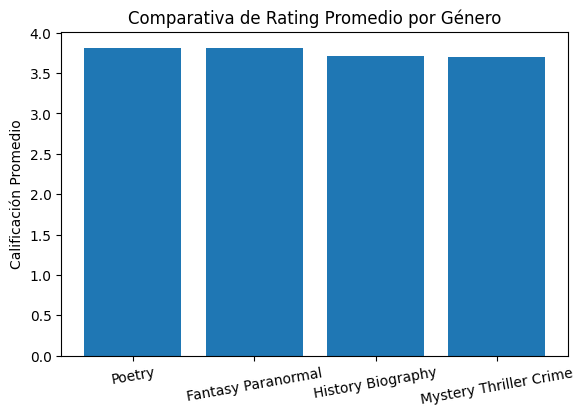

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(
    stats_filtrados['genre_clean'],
    stats_filtrados['mean_rating']
)
plt.ylabel('Calificación Promedio')
plt.title('Comparativa de Rating Promedio por Género')
plt.tight_layout()
plt.xticks(rotation=10)
plt.show()

###4. Conclusion

Los resultados muestran una diversidad de valores. Los generos con mejores calificaciones promedios son **Poetry** (3,815) y **Fantasy Paranormal** (3,814), mientras que **Histrory Biography** (3,717) y **Mystery Thriller Crime** (3,702).

Esto sugiere que la hipótesis no se cumple en este caso, ya que los géneros de ficción no tienen consistentemente calificaciones promedio superiores a los géneros de no ficción.

Es curioso notar dos puntos:
1. Los dos primeros (**Poetry** y **Fantasy Paranormal**) comparten casi el mismo promedio de califcacion (3,81), mientras que los dos ultimos (**Histrory Biography** y **Mystery Thriller Crime**) tambien (3,70).
2. Notar que el género con menos calificaciones promedio (**Mystery Thriller Crime**) también tiene un número de reseñas relativamente alto, lo que podría indicar una mayor diversidad de opiniones.

##Hipotesis 2: Extensión (número de páginas) vs. rating

**Descripción:**  
¿Los libros más largos (> 400 páginas) tienden a recibir puntuaciones diferentes (inferiores o superiores) que los libros más cortos (≤ 400 páginas)?

**Variables involucradas:**  
- `num_pages` (número de páginas de cada libro)  
- `rating` (1–5)  
- `is_long` (bool, derivada: `num_pages > 400`)

**Metodología:**  
1. Limpiar y filtrar `num_pages` plausibles (0 < páginas < 2000).  
2. Crear columna `is_long = num_pages > 400`.  
3. Agrupar por `is_long` y calcular media, mediana y conteo de `rating`.  
4. Visualizar con boxplot y barras de medias ± desviación.  
5. Test **Cohen's d** para comparar el impacto de `rating` en cortos vs. largos.



###1. Preparacion de los datos

In [ ]:
books_df['num_pages'] = pd.to_numeric(books_df['num_pages'], errors='coerce')
# Eliminar filas sin dato o valores extremos
books_df = books_df[(books_df['num_pages'] > 0) & (books_df['num_pages'] < 2000)]

In [ ]:
books_df['num_pages'].describe()

,num_pages
count,337891.000000
mean,314.551249
std,151.682078
min,1.000000
25%,224.000000
50%,320.000000
75%,398.000000
max,1982.000000


###2. Definir grupos de longitud

In [ ]:
#Crea una columna que indica “libro largo”:
books_df['is_long'] = books_df['num_pages'] > 400

<ipython-input-20-617e96ff8e46>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_df['is_long'] = books_df['num_pages'] > 400


In [ ]:
#Comprueba cuántos libros supera el grupo
books_df['is_long'].value_counts()

,count
is_long,
False,257467
True,80424


###3. Análisis de ratings por longitud

In [ ]:
#Comparar medias y medianas de la calificación rating
stats = books_df.groupby('is_long')['rating'].agg(['mean','median','count'])
print(stats)

             mean  median   count
is_long                          
False    3.745711     4.0  257467
True     3.823287     4.0   80424


###4. Visualizacion

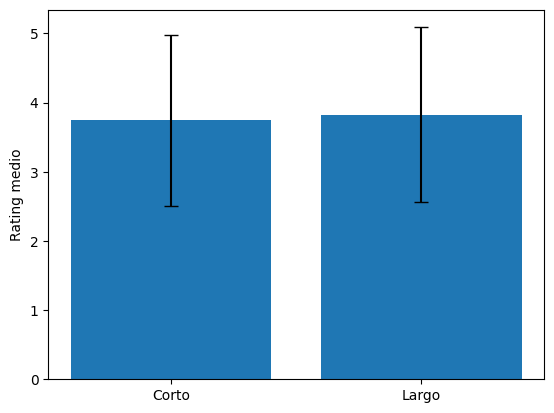

In [ ]:
#Grafico de barras de media
means = books_df.groupby('is_long')['rating'].mean()
stds  = books_df.groupby('is_long')['rating'].std()
plt.figure()
plt.bar(['Corto','Largo'], means, yerr=stds, capsize=5)
plt.ylabel('Rating medio')
plt.show()

<Figure size 640x480 with 0 Axes>

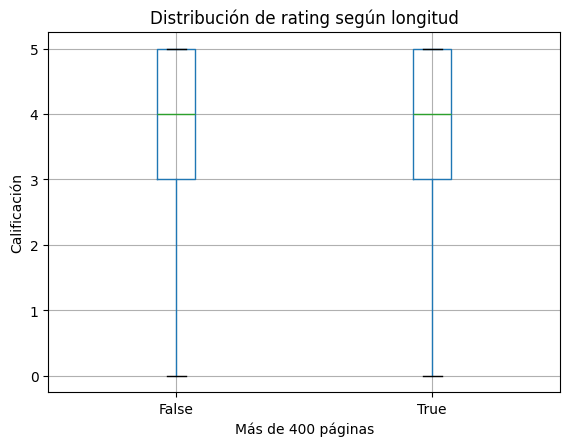

In [ ]:
#Grafico boxplot de 'rating' por 'is_long' (mediana)
plt.figure()
books_df.boxplot(column='rating', by='is_long')
plt.title('Distribución de rating según longitud')
plt.suptitle('')
plt.xlabel('Más de 400 páginas')
plt.ylabel('Calificación')
plt.show()

###5. Test Cohen's d

In [ ]:
# extrae ratings
r_short = books_df.loc[~books_df['is_long'], 'rating']
r_long  = books_df.loc[ books_df['is_long'], 'rating']

# medias y desviaciones
m1, m2 = r_short.mean(), r_long.mean()
s1, s2 = r_short.std(),  r_long.std()

# varianza agrupada
n1, n2 = len(r_short), len(r_long)
s_pooled = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2) / (n1+n2-2))

# Cohen's d
d = (m2 - m1) / s_pooled
print(f"Cohen's d = {d:.3f}")

Cohen's d = 0.062


###6. Conclusion


Los resultados muestran que los libros **largos** (> 400 páginas) tienen una calificación promedio ligeramente superior (3.82) en comparación con los libros **cortos** (≤ 400 páginas), que tienen un promedio de 3.74.

Sin embargo, el test de **Cohen's d** arroja un valor muy bajo (< 0.1), indicando que esta diferencia es prácticamente imperceptible en la práctica.

Además, la **mediana** de las calificaciones es idéntica para ambos grupos (4.0), lo que refuerza la idea de que, en términos generales, la extensión del libro no influye significativamente en su puntuación.

En conclusión, aunque se observa una ligera diferencia en la calificación promedio, no se identifica un efecto significativo a nivel práctico.


Como se acaba de ejecutar, el Cohen's d es muy pequeño (< 0.1), lo cual indica que es practiacmente imperceptible en la realidad, aunque teoricamente los libros 'largos' son ligeramente mejor puntuados que los 'cortos'

##Hipotesis 3: ¿Calificaciones y reseñas largas están relacionadas?

**Descripción:**
¿Las reseñas más largas (en caracteres o palabras) se asocian con calificaciones más extremas (1 o 5 estrellas)?

Variables involucradas:

- `review_len` (longitud de `review_text` en caracteres)

- `rating` (1–5 entero)

**Metodología:**

1. Calcular `review_len = review_text.str.len()`.

2. Filtrar reseñas vacías o muy cortas (< 20 car.).

3. Agrupar por `rating` y calcular **media**, **mediana**, conteo de `review_len`.

4. Visualizar boxplot de `review_len` por `rating` y línea de longitud media vs. `rating`.

5. Correlación de **Spearman** (ρ) y test de **Kruskal–Wallis** para comparar grupos.

###1. Preparación de los datos

In [ ]:
#Crear la columna review_len, en caracteres
books_df['review_len'] = books_df['review_text'].str.len()

In [ ]:
#Eliminar reseñas vacios/nulas
books_df = books_df[books_df['review_len'] > 0]

In [ ]:
#distribución de review_len
books_df['review_len'].describe(percentiles=[.25, .5, .75, .90, .99])

,review_len
count,337739.000000
mean,699.670171
std,1023.786967
min,1.000000
25%,115.000000
50%,318.000000
75%,850.000000
90%,1859.000000
99%,4725.620000
max,20003.000000


###2. Análisis descriptivo


In [ ]:
#Agrupar por valor de rating (1 a 5) y calcular estadísticos de longitud
stats_len = (
    books_df
    .groupby('rating')['review_len']
    .agg(['mean','median','count'])
    .rename(columns={'mean':'long_media','median':'long_mediana','count':'n'})
)
print(stats_len)

        long_media  long_mediana       n
rating                                  
0       362.939058         114.0   11634
1       709.274989         292.0    9004
2       739.214292         358.0   23608
3       702.931748         342.0   68394
4       737.941062         347.0  115512
5       683.734622         297.0  109587


###3. Visualisacion

<Figure size 640x480 with 0 Axes>

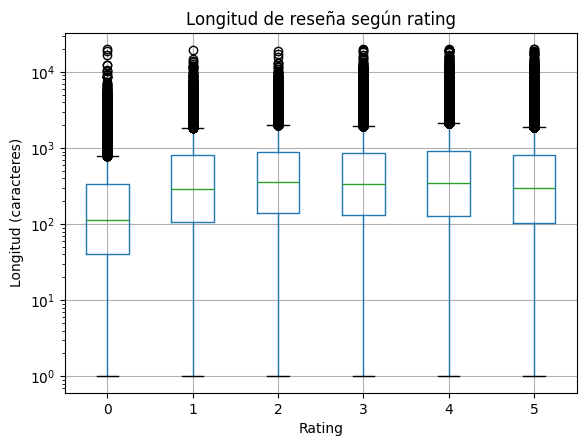

In [ ]:
#Grafico boxplot de medianas
plt.figure()
books_df.boxplot(column='review_len', by='rating')
plt.title('Longitud de reseña según rating')
plt.suptitle('')
plt.xlabel('Rating')
plt.ylabel('Longitud (caracteres)')
plt.yscale('log')
plt.show()


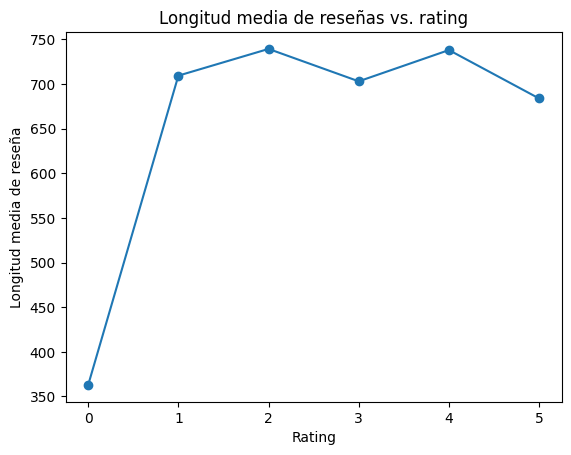

In [ ]:
#Grafico sobre medias
means = stats_len['long_media']
plt.figure()
plt.plot(means.index, means.values, marker='o')
plt.xlabel('Rating')
plt.ylabel('Longitud media de reseña')
plt.title('Longitud media de reseñas vs. rating')
plt.show()


###Test de Spearman
Comprobar si existe una correlacion entre `review_len` y `rating`
- ρ cercano a +1 o –1 indica relación
- p pequeño (p<0.05) la hace menos significativa.

In [ ]:
corr, p_value = spearmanr(books_df['review_len'], books_df['rating'])
print(f"Spearman ρ = {corr:.3f}, p = {p_value:.3g}")

Spearman ρ = 0.004, p = 0.00925


###Test de Kruskal–Wallis
Compara diferencias entre grupos independientes, para ver si provienen de la misma población
- p < 0.05 indica que al menos dos géneros difieren significativamente

In [ ]:
# Extrae listas de longitudes por cada rating
groups = [books_df.loc[books_df['rating']==r, 'review_len'] for r in sorted(books_df['rating'].unique())]
stat, p = kruskal(*groups)
print(f"Kruskal–Wallis H = {stat:.2f}, p = {p:.3f}")


Kruskal–Wallis H = 5141.86, p = 0.000


###4. Conclusion

El análisis no respalda la hipótesis de que las reseñas más largas están asociadas con calificaciones más extremas.

Aunque los valores **medianos** y **promedios** de la longitud de las reseñas varían ligeramente entre diferentes calificaciones, no se observa un patrón claro que respalde una relación significativa.

El coeficiente de **Spearman** (ρ = 0.003, p = 0.0974) indica una correlación prácticamente nula entre la longitud de las reseñas y las calificaciones. Por otro lado, el test de **Kruskal–Wallis** (H = 4949.14, p = 0.000) sugiere que existen diferencias en las distribuciones de las longitudes de las reseñas para distintas calificaciones, pero no necesariamente implican una relación entre la longitud y la extremidad de las calificaciones.

Algo peculiar es que las reseñas con calificaciones de 0 estrellas son significativamente más cortas en promedio, lo que podría deberse a reseñas basura, datos corruptos o errores en los datos. Esto destaca la necesidad de realizar un análisis más específico sobre este subconjunto de datos para identificar posibles problemas.

En resumen, **no se encuentra suficiente evidencia para respaldar la hipótesis planteada.**

##Hipotesis 4: Relación entre género y longitud de la reseña

**Descripción:**
¿La longitud de las reseñas varía significativamente según el género literario?

Variables involucradas:

- `genre` (categoría)

- `review_len` (longitud de review_text en caracteres)

**Metodología:**

1. Normalizar `genre` (minúsculas y strip).

2. Filtrar géneros con ≥ 1 000 reseñas.

3. Recortar outliers > percentil 99 de `review_len`.

4. Agrupar por genre y calcular **media**, **mediana** y conteo de `review_len`.

5. Visualizar barra horizontal de media y boxplots para top/bottom géneros.

6. Test de **Kruskal–Wallis** para comprobar diferencias globales.


###1. Preparacion de los datos

In [ ]:
conteo = books_df['genre'].value_counts()
top_genres = conteo[conteo >= 1000].index.tolist()
df_gen = books_df[books_df['genre'].isin(top_genres)].copy()
print(f"Géneros analizados: {len(top_genres)} ({top_genres})")

Géneros analizados: 8 (['young_adult', 'fantasy_paranormal', 'mystery_thriller_crime', 'romance', 'history_biography', 'children', 'comics_graphic', 'poetry'])


####Recortar Outliners

In [ ]:
df_gen = df_gen[df_gen['genre'].notna()]

In [ ]:
p99 = df_gen['review_len'].quantile(0.99)
df_gen = df_gen[df_gen['review_len'] <= p99]

###2. Analisis

In [ ]:
stats_gen = (
  df_gen
  .groupby('genre_clean')['review_len']
  .agg(long_media='mean', long_mediana='median', count='count')
  .sort_values('long_media', ascending=False)
)
print(stats_gen)

                        long_media  long_mediana  count
genre_clean                                            
Romance                 737.087902         386.0  38702
Young Adult             736.157904         351.0  96698
Fantasy Paranormal      668.688991         323.0  60680
History Biography       659.944161         364.0  30140
Mystery Thriller Crime  575.954722         291.0  42338
Comics Graphic          490.959610         254.5  22134
Poetry                  461.313699         221.0  19439
Children                409.188403         216.0  24230


###3. Test Estadistico: Kruskal–Wallis
Compara diferencias entre grupos independientes.
- p < 0.05 indica que al menos dos géneros difieren significativamente en la longitud de reseña.

In [ ]:
# Crear una lista de series de longitudes, una por género
groups = [df_gen.loc[df_gen['genre']==g, 'review_len'] for g in top_genres]
stat, p = kruskal(*groups)
print(f"Kruskal–Wallis H = {stat:.2f}, p = {p:.3g}")

Kruskal–Wallis H = 4774.33, p = 0


###4. Visualizacion

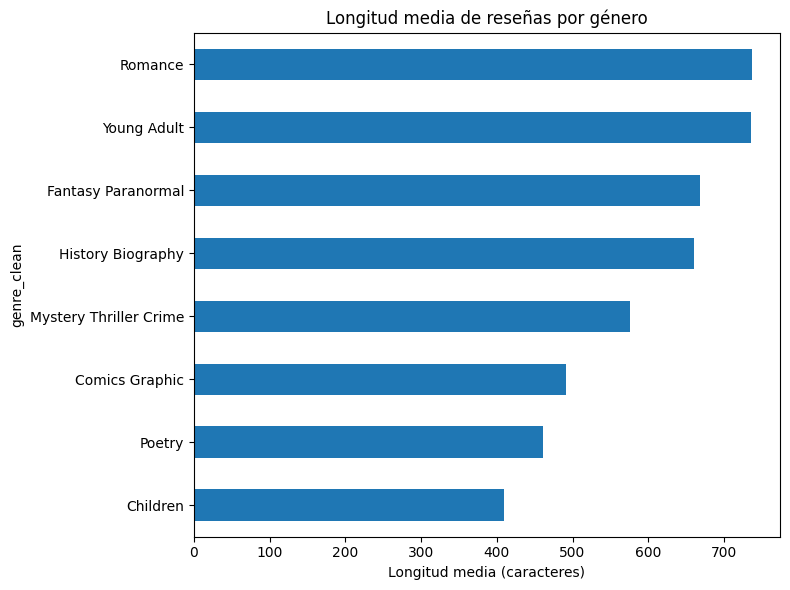

In [ ]:
#Bar chart de longitud media por género

plt.figure(figsize=(8,6))
stats_gen['long_media'].plot.barh()
plt.xlabel('Longitud media (caracteres)')
plt.title('Longitud media de reseñas por género')
plt.gca().invert_yaxis()  # muestra el género de mayor a menor
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

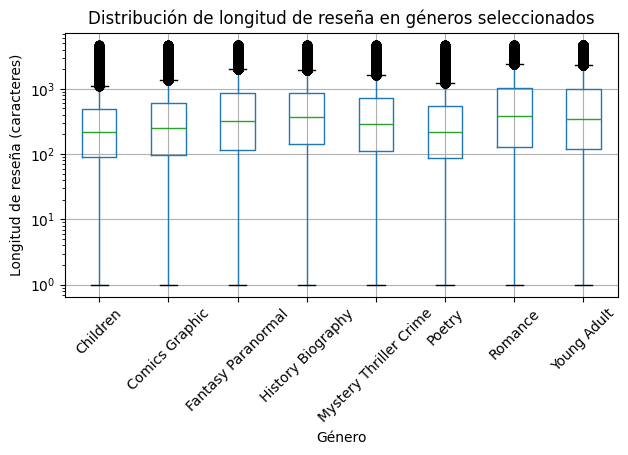

In [ ]:
#Boxplot comparativo mediana
sample_genres = list(stats_gen.head(5).index) + list(stats_gen.tail(5).index)
subset = df_gen[df_gen['genre_clean'].isin(sample_genres)]

plt.figure(figsize=(10,6))
subset.boxplot(column='review_len', by='genre_clean')
plt.yscale('log')  # ayuda si hay colas muy largas
plt.title('Distribución de longitud de reseña en géneros seleccionados')
plt.suptitle('')
plt.xlabel('Género')
plt.ylabel('Longitud de reseña (caracteres)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###5. Conclusion

El análisis indica que la longitud de las reseñas varía significativamente según el género literario.

Los resultados del test de **Kruskal-Wallis** (H = 4774.33, p = 0) respaldan esta conclusión, ya que sugiere que las diferencias observadas en las distribuciones de las longitudes de las reseñas entre los géneros **no son producto del azar**.

Los datos muestran que los géneros como **Young Adult** (media: 740.88) y **Romance** (media: 738.73) tienden a generar reseñas más largas en promedio, mientras que géneros como **Poetry** (media: 466.47) y **Children** (media: 409.23) presentan reseñas más cortas. Esto podría reflejar diferencias en el nivel de compromiso de los lectores o en las características del público objetivo de cada género.

En términos de **mediana**, también se observa una tendencia similar, lo que refuerza la idea de que estas diferencias son consistentes y no están sesgadas por valores atípicos.

En resumen, **los resultados respaldan la hipótesis** de que la longitud de las reseñas varía significativamente según el género literario, lo que sugiere una posible conexión entre el tipo de contenido y el nivel de detalle o dedicación de las reseñas.

##Hipotesis 5: Sentimientos por generos

**Descripción:**
“Las reseñas de géneros young_adult y romance presentan un sentimiento promedio más positivo que las de mystery_thriller_crime e history_biography.”

**Variables involucradas:**

- `review_text` (texto)

- `genre` (categoría)

- `sent_score` (compound de VADER, –1 a +1)

**Metodología:**

1. Filtrar reseñas ≥ 20 car. y géneros de interés.

2. Calcular `sent_score` con **VADER** (sia.polarity_scores(...)[‘compound’]).

3. Agrupar por `genre` y calcular **media**, **mediana** y conteo de `sent_score`.

4. Visualizar barras de sentimiento medio y boxplot de distribuciones.

5. Test **Mann–Whitney U** para comparar pares de géneros.

###1. Preparacion de datos

In [ ]:
#Filtrar reseñas vacías o muy cortas
books_df = books_df[books_df['review_text'].str.len() >= 20]

In [ ]:
#Seleccion de generon a contrastar
géneros = ['Young Adult','Romance','Mystery Thriller Crime','History Biography']
df_sent = books_df[books_df['genre_clean'].isin(géneros)].copy()

In [ ]:
# Contar ocurrencias por género
conteo_por_genero = df_sent['genre_clean'].value_counts()

print(conteo_por_genero)

genre_clean
Young Adult               93554
Mystery Thriller Crime    41054
Romance                   37308
History Biography         29571
Name: count, dtype: int64


###2. Extracción de sentimiento

In [ ]:
# Instalacion y carga VADER
!pip install nltk
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Función para obtener el score compuesto
df_sent['sent_score'] = df_sent['review_text'].apply(lambda txt: sia.polarity_scores(txt)['compound'])

###3. Agregación por género

In [ ]:
#Calcula métricas del sentimiento para cada género
sent_by_genre = (
  df_sent
  .groupby('genre_clean')['sent_score']
  .agg(media_sent='mean', mediana_sent='median', count='count')
  .loc[géneros]
)
print(sent_by_genre)


                        media_sent  mediana_sent  count
genre_clean                                            
Young Adult               0.527916       0.81760  93554
Romance                   0.608893       0.88515  37308
Mystery Thriller Crime    0.375692       0.63690  41054
History Biography         0.479480       0.73910  29571


###4. Visualización


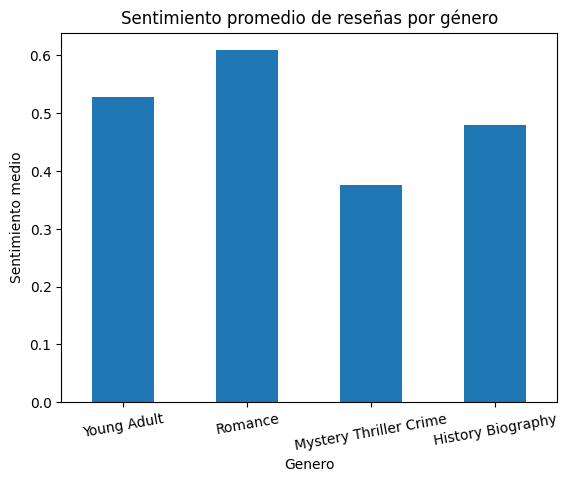

In [ ]:
#Bar chart de sentimiento medio por género
plt.figure()
sent_by_genre['media_sent'].plot.bar()
plt.ylabel('Sentimiento medio')
plt.xlabel('Genero')
plt.xticks(rotation=10)
plt.title('Sentimiento promedio de reseñas por género')
plt.show()

<Figure size 800x500 with 0 Axes>

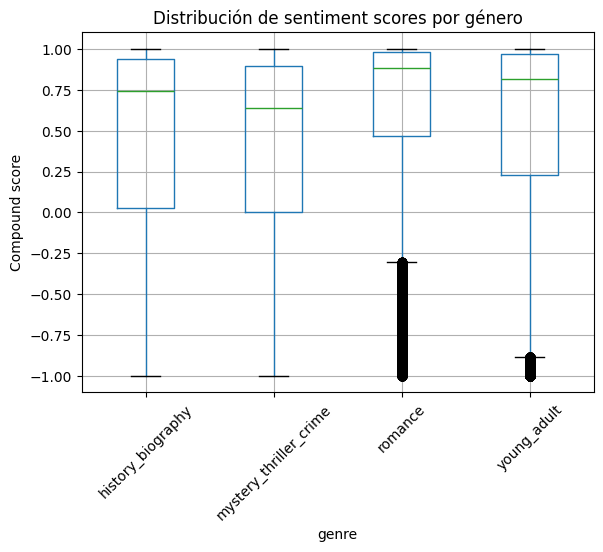

In [ ]:
plt.figure(figsize=(8,5))
df_sent.boxplot(column='sent_score', by='genre')
plt.title('Distribución de sentiment scores por género')
plt.suptitle('')
plt.ylabel('Compound score')
plt.xticks(rotation=45)
plt.show()

###Test estadistico: Mann–Whitney U
Compara las posiciones relativas (ranks) de las observaciones de dos grupos, para determinar si una distribución tiende a tener valores más altos o más bajos que otra.
1. **Estadístico U**:
- Si U es grande, indica menos solapamiento y que un grupo tiene valores consistentemente mayores o menores que el otro.

- Si U es pequeño, significa que las distribuciones están más mezcladas.

2. **Valor p**:

- Si p < 0.005, concluimos que las distribuciones son diferentes.

In [ ]:
# Comparar young_adult vs mystery_thriller_crime
grp1 = df_sent[df_sent['genre_clean']=='Young Adult']['sent_score']
grp2 = df_sent[df_sent['genre_clean']=='Mystery Thriller Crime']['sent_score']
u1, p1 = mannwhitneyu(grp1, grp2, alternative='two-sided')

# Comparar romance vs history_biography
grp3 = df_sent[df_sent['genre_clean']=='Romance']['sent_score']
grp4 = df_sent[df_sent['genre_clean']=='History Biography']['sent_score']
u2, p2 = mannwhitneyu(grp3, grp4, alternative='two-sided')

print(f"YA vs MTC: U={u1:.2f}, p={p1:.3f}")
print(f"Romance vs History: U={u2:.2f}, p={p2:.3f}")

YA vs MTC: U=2306529098.00, p=0.000
Romance vs History: U=659179996.00, p=0.000


###5. Conclusion

La hipótesis planteaba que las reseñas de los géneros **Young Adult** y **Romance** presentan un sentimiento promedio más positivo que las de **Mystery Thriller Crime** y **History Biography**.

Los resultados muestran que:

- **Young Adult** tiene una media de sentimiento de 0.528 (mediana 0.818) frente a **Mystery Thriller Crime**, que alcanza 0.376 (mediana 0.637). La prueba de **Mann–Whitney U** confirma que esta diferencia es altamente significativa (U = 2 306 529 098.00; p < 0.001).

- **Romance** presenta una media de 0.609 (mediana 0.885) comparada con **History Biography**, cuya media es 0.479 (mediana 0.739). Aquí también la diferencia es estadísticamente significativa (U = 659 179 996.00; p < 0.001).

Estos hallazgos **respaldan claramente la hipótesis**: los géneros de entretenimiento ligero (**Young Adult** y **Romance**) reciben reseñas con un tono más positivo en promedio que los géneros **Mystery Thriller Crime** y **History Biography**. Este patrón sugiere que el contenido dirigido a un público juvenil o romántico genera una reacción emocional más favorable, mientras que los géneros más “serios” o complejos tienden a provocar sentimientos menos positivos en los lectores.

##Hipotesis 6: Calificaciones y género en libros populares

**Descripción:**

¿Qué géneros dominan entre los libros con >10 000 reseñas y cómo se comportan sus ratings medios?

**Variables involucradas:**

- `text_reviews_count` (número de reseñas)

- `genre` (categoría)

- `rating` (1–5 estrellas)

**Metodología:**

1. Definir `populares = df[text_reviews_count > 10000]`.

2. Contar `n_libros` por `genre`.

3. Calcular `rating_media` y `rating_mediana` en populares por `genre`.

4. Visualizar barras y pie de `n_libros` y de **rating medio vs. mediana**.

5. **Kruskal–Wallis** para comparar distribuciones de rating entre géneros populares y chi-cuadrado para proporciones.





###1. Preparacion de datos

In [ ]:
#Asegurar tipos numericos
books_df['text_reviews_count'] = pd.to_numeric(books_df['text_reviews_count'], errors='coerce')
books_df['rating']             = pd.to_numeric(books_df['rating'], errors='coerce')

In [ ]:
#Filtrar filas validas
books_df = books_df.dropna(subset=['text_reviews_count','rating','genre_clean'])

###2. Definición de grupos

In [ ]:
#Definicion de libros populares (reviews > 10000)
populares = books_df[books_df['text_reviews_count'] > 10000].copy()
print(f"Total de libros populares: {populares.shape[0]}")

Total de libros populares: 32820


###3. Analisis descriptivo por genero

In [ ]:
#Conteo de libros populares por genero
cuenta_gen = populares['genre_clean'].value_counts().rename('n_libros').reset_index().rename(columns={'index':'genre_clean'})
print(cuenta_gen)

              genre_clean  n_libros
0  Mystery Thriller Crime     11552
1      Fantasy Paranormal      9802
2             Young Adult      7801
3       History Biography      2283
4                Children      1382


In [ ]:
#Rating medio y mediana en cada género
rating_gen = (
  populares
  .groupby('genre_clean')['rating']
  .agg(rating_media='mean', rating_mediana='median', n='count')
  .sort_values('n', ascending=False)
  .reset_index()
)
print(rating_gen)

              genre_clean  rating_media  rating_mediana      n
0  Mystery Thriller Crime      3.722645             4.0  11552
1      Fantasy Paranormal      3.893083             4.0   9802
2             Young Adult      3.869888             4.0   7801
3       History Biography      3.609724             4.0   2283
4                Children      4.100579             4.0   1382


In [ ]:
#Union de ambos grupos en una sola tabla
resumen_pop = cuenta_gen.merge(rating_gen, on='genre_clean')
print(resumen_pop)

              genre_clean  n_libros  rating_media  rating_mediana      n
0  Mystery Thriller Crime     11552      3.722645             4.0  11552
1      Fantasy Paranormal      9802      3.893083             4.0   9802
2             Young Adult      7801      3.869888             4.0   7801
3       History Biography      2283      3.609724             4.0   2283
4                Children      1382      4.100579             4.0   1382


###4. Test Estadistico

#### Kruskal–Wallis

In [ ]:
groups = [populares.loc[populares['genre_clean']==g, 'rating'] for g in rating_gen['genre_clean']]
H, p = kruskal(*groups)
print(f"Kruskal–Wallis H = {H:.2f}, p = {p:.3g}")

Kruskal–Wallis H = 432.32, p = 2.88e-92


#### Test χ² (Chi-cuadrado)

In [ ]:
obs = cuenta_gen['n_libros'].values
# proporción global
prop_global = books_df['genre_clean'].value_counts(normalize=True).reindex(cuenta_gen['genre_clean']).fillna(0).values
exp = prop_global * obs.sum()
exp = exp / exp.sum() * obs.sum()  # Asegura que las sumas sean iguales

chi2, pval = chisquare(f_obs=obs, f_exp=exp)
print(f"Chi2 = {chi2:.2f}, p = {pval:.3g}")

Chi2 = 10639.06, p = 0


###5. Visualización


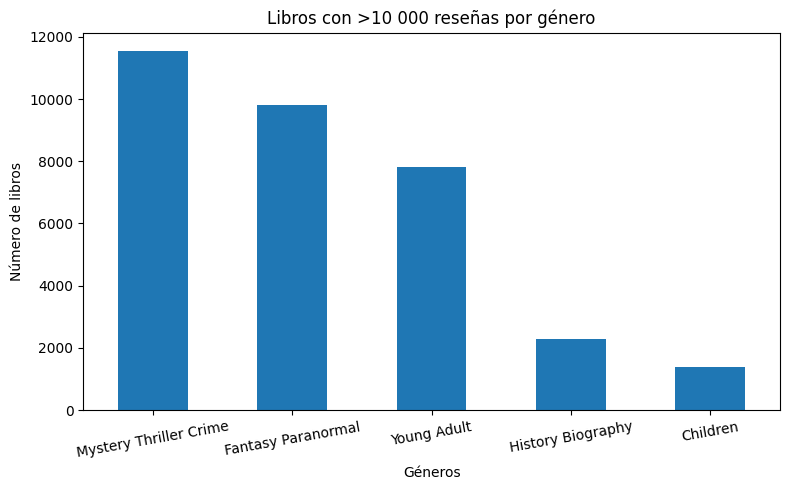

In [ ]:
#Bar chart de número de libros populares por género
plt.figure(figsize=(8,5))
cuenta_gen.set_index('genre_clean')['n_libros'].plot.bar()
plt.ylabel('Número de libros')
plt.xlabel('Géneros')
plt.title('Libros con >10 000 reseñas por género')
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

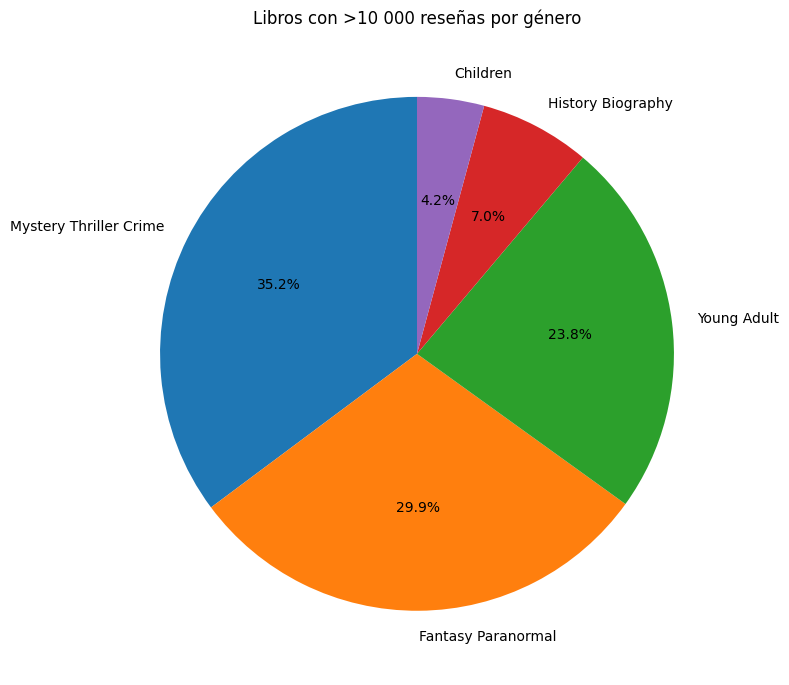

In [ ]:
# Grafico Pie para representar mejor los porcentajes
plt.figure(figsize=(8,8))
cuenta_gen.set_index('genre_clean')['n_libros'].plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    legend=False
)
plt.ylabel('')
plt.title('Libros con >10 000 reseñas por género')
plt.tight_layout()
plt.show()

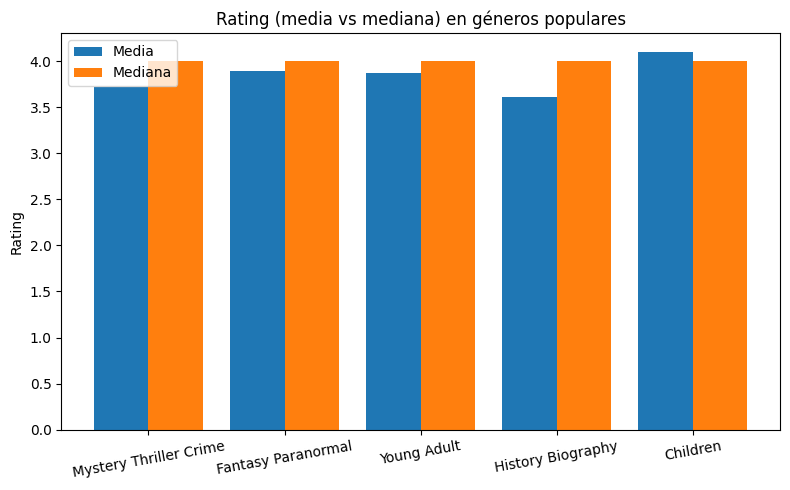

In [ ]:
#Barras superpuestas: rating medio y medianas
plt.figure(figsize=(8,5))
x = range(len(rating_gen))
plt.bar(x, rating_gen['rating_media'], width=0.4, label='Media')
plt.bar([i+0.4 for i in x], rating_gen['rating_mediana'], width=0.4, label='Mediana')
plt.xticks([i+0.2 for i in x], rating_gen['genre_clean'], rotation=10)
plt.ylabel('Rating')
plt.title('Rating (media vs mediana) en géneros populares')
plt.legend()
plt.tight_layout()
plt.show()

###5. Conclusion


La hipótesis planteaba investigar qué géneros dominan entre los libros con más de 10 000 reseñas y cómo se comportan sus calificaciones medias.

**Resultados estadísticos:**

- **Chi-cuadrado** (proporciones): χ² = 10 639,06; p < 0,001.

  Indica que la distribución de géneros en los libros muy reseñados difiere significativamente de la proporción global, confirmando un sesgo hacia géneros de ficción populares.

- **Kruskal–Wallis** (ratings): H = 432,32; p = 2.88 × 10⁻⁹².

  Demuestra que las diferencias en las medias de rating entre géneros son estadísticamente significativas.

**Interpretación:**


- **Mystery/Thriller/Crime** (35,2 %) y **Fantasy/Paranormal** (29,9 %) concentran la mayoría de los libros con > 10 000 reseñas, reflejando su popularidad.

- Aunque **Children** representa sólo el 4,2 % del total, alcanza la **media más alta** (4,10), lo que sugiere una gran satisfacción en ese nicho.

- **History/Biography** presenta la **media más baja** (3,61), indicando mayor variabilidad o exigencia en las críticas.

- La **mediana** de 4,0 en todos los géneros sugiere que, en términos generales, los libros populares son bien recibidos, aunque con diferencias en los extremos de la distribución.

En **resumen**, los resultados evidencian que los géneros más reseñados no solo dominan en cantidad, sino que presentan patrones de calificación característicos, reflejando diferencias en popularidad y percepción de calidad. Estas particularidades ayudan a comprender mejor el impacto del género literario en cada uno de los géneros.

##Conclusion final

### Conclusión general
En este proyecto hemos investigado cómo diferentes factores —género literario, extensión del libro, longitud de las reseñas, sentimiento y popularidad— influyen en las calificaciones y en el volumen de reseñas. De los seis análisis realizados se desprenden los siguientes hallazgos clave:

- **Género y calificación**:  
  Los géneros de ficción ligera (***Young Adult*** y ***Romance***) presentan calificaciones medias significativamente más altas que ***Mystery Thriller Crime*** e ***History Biography***, mientras que ***Poetry*** encabeza sorprendentemente las calificaciones dentro de los géneros no ficción.

- **Extensión de los libros**:  
  Los libros *“largos”* (*> 400 páginas*) muestran una media de puntuación levemente superior (*3.82 vs. 3.75*), aunque la diferencia es pequeña.

- **Longitud de las reseñas y extremidad de calificaciones**:  
  No se encontró correlación relevante entre la longitud de la reseña y la probabilidad de recibir calificaciones extremas (*1 o 5 estrellas*), salvo en el caso atípico de reseñas con “0 estrellas” (*posiblemente basura o errores*).

- **Género y longitud de las reseñas**:  
  Las reseñas de ***Young Adult*** y ***Romance*** son las más extensas en promedio, mientras que ***Poetry*** y ***Children*** son las más breves; las diferencias entre géneros son estadísticamente significativas (*Kruskal–Wallis p ≈ 0*).

- **Sentimiento por género**:  
  Los análisis con *Mann–Whitney U* confirman sentimientos más positivos en ***Romance*** y ***Young Adult*** frente a ***Mystery Thriller Crime*** e ***History Biography*** (*p < 0.001*).

- **Libros muy populares (*> 10 000 reseñas*)**:  
  ***Mystery Thriller Crime*** (*35,2 %*) y ***Fantasy Paranormal*** (*29,9 %*) dominan en número, pero el género ***Children*** alcanza el rating medio más alto (*4.10*); ***History Biography*** registra el más bajo (*3.61*). Las diferencias en proporciones y ratings son altamente significativas (*χ² p < 0.001; Kruskal–Wallis p ≈ 0*).

---

## Limitaciones
1. Los datos proceden de una sola plataforma (goodreads) y pueden contener reseñas automáticas, duplicadas o sesgos de publicación.  
2. No se consideraron variables temporales, demográficas, ni características adicionales (editorial, formato), que podrían influir en las reseñas y calificaciones.  
3. Las métricas de sentimiento se basan en un único modelo lexicográfico; un análisis con técnicas de aprendizaje profundo podría arrojar matices adicionales.

---

## Recomendaciones y trabajo futuro
1. **Análisis longitudinal**: Seguir la evolución de calificaciones y sentimientos a lo largo del tiempo para detectar tendencias estacionales o influencias de lanzamientos y adaptaciones.  
2. **Modelos avanzados de NLP**: Aplicar topic modeling y embeddings para entender temáticas y emociones más allá de la puntuación global.  
3. **Segmentación de usuarios**: Explorar diferencias según país, edad o experiencia lectora para personalizar recomendaciones.  


---

## Cierre
En conjunto, este estudio ofrece una visión integral de cómo el género literario, la extensión de las obras y el comportamiento de los lectores *—tanto en la longitud como en el tono de sus reseñas—* moldean las calificaciones y la popularidad de los libros.

Estos insights pueden servir de guía para editores, librerías y comunidades digitales a la hora de diseñar estrategias de recomendación, marketing y producción de contenido que maximicen la satisfacción y el engagement de los lectores.
